### Libraries 

In [6]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing import image
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]


In [8]:
train_path = "C:/Users/Hmz/Downloads/Compressed/Malaria-Detection-master/Dataset/Train"
valid_path =  "C:/Users/Hmz/Downloads/Compressed/Malaria-Detection-master/Dataset/Test"


In [9]:
# adding the preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False

# useful for getting number of classes
folders = glob("C:/Users/Hmz/Downloads/Compressed/Malaria-Detection-master/Dataset/Train/*")

#The Layers are
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
  

80142336/80134624 [==============================] - 49s 1us/step


### Create the model  

In [10]:
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
#Optimization method used
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


### Splitting the dataset 

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory("C:/Users/Hmz/Downloads/Compressed/Malaria-Detection-master/Dataset/Train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("C:/Users/Hmz/Downloads/Compressed/Malaria-Detection-master/Dataset/Test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


### Fitting the model 

Epoch 1/5
13/13 [==============================] - 239s 18s/step - loss: 0.2782 - accuracy: 0.9087 - val_loss: 0.3733 - val_accuracy: 0.7836
Epoch 2/5
13/13 [==============================] - 285s 22s/step - loss: 0.2836 - accuracy: 0.8918 - val_loss: 0.4235 - val_accuracy: 0.7910
Epoch 3/5
13/13 [==============================] - 264s 20s/step - loss: 0.2506 - accuracy: 0.8942 - val_loss: 0.6569 - val_accuracy: 0.6493
Epoch 4/5
13/13 [==============================] - 246s 19s/step - loss: 0.2281 - accuracy: 0.9183 - val_loss: 0.2819 - val_accuracy: 0.8955
Epoch 5/5
13/13 [==============================] - 241s 19s/step - loss: 0.1967 - accuracy: 0.9327 - val_loss: 0.3695 - val_accuracy: 0.8060


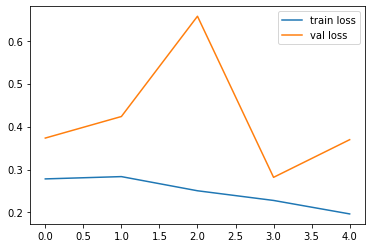

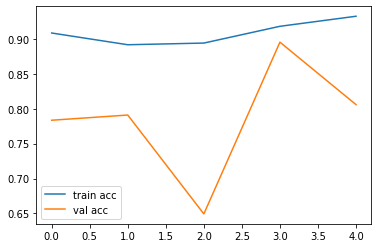

<Figure size 432x288 with 0 Axes>

In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [15]:
import tensorflow as tf

from tensorflow.keras.models import load_model

model.save('model_Malaria_vgg19.h5')

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
model = load_model('model_vgg19.h5')
img = image.load_img("C:/Users/Hmz/Downloads/Compressed/Malaria-Detection-master/Dataset/Test/Uninfected/2.png", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

In [19]:
classes

array([[1.0000000e+00, 2.1548344e-18]], dtype=float32)